In [2]:
import numpy as np
from scipy import stats

import seaborn as sns
sns.set(font='Yu Gothic')
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
def load_numpy(hold_position):
    x = np.load("../Data/センサ別npyファイル/train/train_" + hold_position + "/train_" + hold_position + "_Glo_Acc.npy")[:, :, 2]
    return x

In [3]:
Bag = load_numpy("Bag")
HIps = load_numpy("Hips")
Torso = load_numpy("Torso")
Hand = load_numpy("Hand")

Bag.shape

(195491, 500)

In [17]:
def get_skew(x):
    x_kurtosis = stats.kurtosis(x, axis=1)
    x_skew = stats.skew(x, axis=1)
    result = np.concatenate([x_kurtosis.reshape([-1, 1]), x_skew.reshape([-1, 1])], axis=1)
    del x_kurtosis, x_skew
    return result

In [18]:
Bag_skew = get_skew(Bag)
Hips_skew = get_skew(HIps)
Torso_skew = get_skew(Torso)
Hand_skew = get_skew(Hand)

Bag_skew.shape

(195491, 2)

In [19]:
np.save("train_Bag_glo_accel_z_skew_kurtosis", Bag_skew)
np.save("train_Hips_glo_accel_z_skew_kurtosis", Hips_skew)
np.save("train_Torso_glo_accel_z_skew_kurtosis", Torso_skew)
np.save("train_Hand_glo_accel_z_skew_kurtosis", Hand_skew)

In [19]:
def fft(x):
    for i in range(x.shape[0]):
        x[i] = x[i] - np.mean(x[i])
    x = np.abs(np.fft.fft(x, axis=1))
    max_amplitude = np.amax(x, axis=1)
    max_index = np.argmax(x, axis=1)
    max_frequency = max_index * 0.2
    result = np.concatenate([max_amplitude.reshape([-1, 1]), max_frequency.reshape([-1, 1])], axis=1)
    return result

In [20]:
Bag_FFT = fft(Bag)

Bag_FFT

array([[2.47077006e+02, 2.00000000e-01],
       [1.60738246e+03, 9.98000000e+01],
       [2.63717766e+02, 2.20000000e+00],
       ...,
       [1.09618602e+02, 1.30000000e+01],
       [1.58450690e+02, 1.20000000e+01],
       [2.17013524e+02, 1.14000000e+01]])

In [21]:
Bag_FFT[:, 1] != 0

array([ True,  True,  True, ...,  True,  True,  True])

In [22]:
Bag_FFT.shape

(195491, 2)

(0, 250)

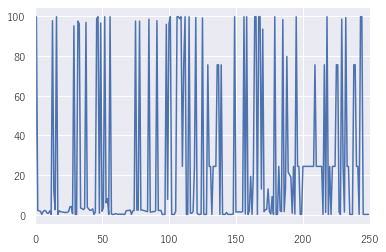

In [27]:
plt.plot(Bag_FFT[0:250, 1])
plt.xlim(0, 250)
# plt.ylim(0, 100)

In [29]:
Hips_FFT = fft(HIps)
Torso_FFT = fft(Torso)
Hand_FFT = fft(Hand)

Hand_FFT.shape

(195491, 2)

In [30]:
np.save("train_Bag_glo_accel_z_amplitude_frequency", Bag_FFT)
np.save("train_Hips_glo_accel_z_amplitude_frequency", Hips_FFT)
np.save("train_Torso_glo_accel_z_amplitude_frequency", Torso_FFT)
np.save("train_Hand_glo_accel_z_amplitude_frequency", Hand_FFT)

In [1]:
%reset

# ここからvalidationデータの前処理

In [3]:
import numpy as np
from scipy import stats

import seaborn as sns
sns.set(font='Yu Gothic')
import matplotlib.pyplot as plt
%matplotlib inline

import pickle

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [4]:
Bag = pickle.load(open("validation_Bag.binaryfile", 'rb'))
Hips = pickle.load(open("validation_Hips.binaryfile", 'rb'))
Torso = pickle.load(open("validation_Torso.binaryfile", 'rb'))
Hand = pickle.load(open("validation_Hand.binaryfile", 'rb'))

Bag.shape

(28685, 500, 24)

In [7]:
def get_skew(x):
    x_kurtosis = stats.kurtosis(x[:, :, 6], axis=1)
    x_skew = stats.skew(x[:, :, 6], axis=1)
    result = np.concatenate([x_kurtosis.reshape([-1, 1]), x_skew.reshape([-1, 1])], axis=1)
    del x_kurtosis, x_skew
    return result

In [9]:
Bag_skew = get_skew(Bag)
Hips_skew = get_skew(Hips)
Torso_skew = get_skew(Torso)
Hand_skew = get_skew(Hand)

Bag_skew.shape

(28685, 2)

In [10]:
np.save("validation_Bag_glo_accel_z_skew_kurtosis", Bag_skew)
np.save("validation_Hips_glo_accel_z_skew_kurtosis", Hips_skew)
np.save("validation_Torso_glo_accel_z_skew_kurtosis", Torso_skew)
np.save("validation_Hand_glo_accel_z_skew_kurtosis", Hand_skew)

In [14]:
def fft(x):
    for i in range(x.shape[0]):
        x[i, :, 6] = x[i, :, 6] - np.mean(x[i, :, 6], axis=0)
    x[:, :, 6] = np.abs(np.fft.fft(x[:, :, 6], axis=1))
    max_amplitude = np.amax(x[:, :, 6], axis=1)
    max_index = np.argmax(x[:, :, 6], axis=1)
    max_frequency = max_index * 0.2
    result = np.concatenate([max_amplitude.reshape([-1, 1]), max_frequency.reshape([-1, 1])], axis=1)
    return result

In [15]:
Bag_FFT = fft(Bag)
Hips_FFT = fft(Hips)
Torso_FFT = fft(Torso)
Hand_FFT = fft(Hand)

Hand_FFT.shape

(28685, 2)

In [16]:
np.save("validation_Bag_glo_accel_z_amplitude_frequency", Bag_FFT)
np.save("validation_Hips_glo_accel_z_amplitude_frequency", Hips_FFT)
np.save("validation_Torso_glo_accel_z_amplitude_frequency", Torso_FFT)
np.save("validation_Hand_glo_accel_z_amplitude_frequency", Hand_FFT)

In [18]:
def val_Preprocess(x):
    x_xy = np.sqrt(np.square(x[:, :, 4].copy()) + np.square(x[:, :, 5].copy()))
    x_xy_mean = np.mean(x_xy.copy(), axis=1)
    x_xy_var = np.var(x_xy.copy(), axis=1)
    x_z_mean = np.mean(x[:, :, 6].copy(), axis=1)
    x_z_var = np.var(x[:, :, 6].copy(), axis=1)
    x_pressure_change = x[:, -1, -1] - x[:, 0, -1]
    result = np.vstack([x_xy_mean, x_xy_var, x_z_mean, x_z_var, x_pressure_change]).T
    return result

In [19]:
Bag_preprocess = val_Preprocess(Bag)
Hips_preprocess = val_Preprocess(Hips)
Torso_preprocess = val_Preprocess(Torso)
Hand_preprocess = val_Preprocess(Hand)

Bag_preprocess.shape

(28685, 5)

In [20]:
def save_npy(x, hold_position):
    np.save("validation_" + hold_position + "_glo_accel_xy_mean", x[:, 0])
    np.save("validation_" + hold_position + "_glo_accel_xy_var", x[:, 1])
    np.save("validation_" + hold_position + "_glo_accel_z_mean", x[:, 2])
    np.save("validation_" + hold_position + "_glo_accel_z_var", x[:, 3])
    np.save("validation_" + hold_position + "pressure_change", x[:, 4])

In [22]:
save_npy(Bag_preprocess, "Bag")
save_npy(Hips_preprocess, "Hips")
save_npy(Torso_preprocess, "Torso")
save_npy(Hand_preprocess, "Hand")

## trainデータのGlo_LAccの変形

In [7]:
def load_numpy(hold_position):
    x = np.load("../Data/センサ別npyファイル/train/train_" + hold_position + "/train_" + hold_position + "_Glo_LAcc.npy")
    return x

In [8]:
Bag = load_numpy("Bag")
HIps = load_numpy("Hips")
Torso = load_numpy("Torso")
Hand = load_numpy("Hand")

Bag.shape

(195491, 500, 3)

In [16]:
def lacc_convert(x):
    x_xy = np.sqrt(np.square(x[:, :, 0]) + np.square(x[:, :, 1]))
    x_xy_mean = np.mean(x_xy, axis=1)
    x_xy_var = np.var(x_xy, axis=1)
    x_z_mean = np.mean(x[:, :, 2], axis=1)
    x_z_abs_mean = np.mean(np.abs(x[:, :, 2]), axis=1)
    x_z_var = np.var(x[:, :, 2], axis=1)
    x_z_kurtosis = stats.kurtosis(x[:, :, 2], axis=1)
    x_z_skew = stats.skew(x[:, :, 2], axis=1)
    result = np.concatenate([x_xy_mean.reshape(-1, 1), x_xy_var.reshape([-1, 1]), x_z_mean.reshape([-1, 1]), x_z_abs_mean.reshape([-1, 1]), x_z_var.reshape([-1, 1]), x_z_skew.reshape([-1, 1]), x_z_kurtosis.reshape([-1, 1])], axis=1)
    del x_xy, x_xy_mean, x_xy_var, x_z_mean, x_z_abs_mean, x_z_var
    return result

In [17]:
Bag_lacc = lacc_convert(Bag)
Hips_lacc = lacc_convert(HIps)
Torso_lacc = lacc_convert(Torso)
Hand_lacc = lacc_convert(Hand)

Hand_lacc.shape

(195491, 7)

In [18]:
def save_npy(x, hold_position):
    np.save("train_" + hold_position + "_glo_laccel_xy_mean", x[:, 0])
    np.save("train_" + hold_position + "_glo_laccel_xy_var", x[:, 1])
    np.save("train_" + hold_position + "_glo_laccel_z_mean", x[:, 2])
    np.save("train_" + hold_position + "_glo_laccel_z_abs_mean", x[:, 3])
    np.save("train_" + hold_position + "_glo_laccel_z_var", x[:, 4])
    np.save("train_" + hold_position + "_glo_laccel_z_skew", x[:, 5])
    np.save("train_" + hold_position + "_glo_laccel_z_kurtosis", x[:, 6])

In [19]:
save_npy(Bag_lacc, "Bag")
save_npy(Hips_lacc, "Hips")
save_npy(Torso_lacc, "Torso")
save_npy(Hand_lacc, "Hand")

In [20]:
def fft(x):
    for i in range(x.shape[0]):
        x[i] = x[i] - np.mean(x[i])
    x = np.abs(np.fft.fft(x, axis=1))
    max_amplitude = np.amax(x, axis=1)
    max_index = np.argmax(x, axis=1)
    max_frequency = max_index * 0.2
    result = np.concatenate([max_amplitude.reshape([-1, 1]), max_frequency.reshape([-1, 1])], axis=1)
    return result

In [22]:
Bag_FFT = fft(Bag[:, :, 2])
Hips_FFT = fft(HIps[:, :, 2])
Torso_FFT = fft(Torso[:, :, 2])
Hand_FFT = fft(Hand[:, :, 2])

Hand_FFT.shape

(195491, 2)

In [23]:
np.save("train_Bag_glo_laccel_z_amplitude_frequency", Bag_FFT)
np.save("train_Hips_glo_laccel_z_amplitude_frequency", Hips_FFT)
np.save("train_Torso_glo_laccel_z_amplitude_frequency", Torso_FFT)
np.save("train_Hand_glo_laccel_z_amplitude_frequency", Hand_FFT)